# Assignment 7

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

神经元的计算过程是先对输入的数据进行线性计算，然后再通过一个非线性激活函数输出结果。
具体可表示为$y=activation(Wx+b)$，其中activation()是一个非线性的激活函数，例如sigmoid(),relu(),tanh()等。

####  2. Why we use non-linear activation funcitons in neural networks?

神经网络中的激活函数是为了让模型具有非线性拟合能力，可以拟合数据中非常复杂的非线性关系。

如果不加激活函数的话只能处理线性可分的问题，即使经过n层变换也相当于做了一次wx+b。

激活函数的要求：（1）可导可微，（2）非线性变化，（3）梯度不能剧烈


#### 3. What is the 'Logistic Loss' ?

logistic loss本质是一个对数似然函数，对于一个二分类的数据集${(x_1,y_1),(x_2,y_2),...,(x_n,y_n)},y_i=0,1$，令$P_i=P(y_i=1|x_i)$，则logistic loss为：  
    
   $$\begin{eqnarray*}
    L(\theta)&=&log[\prod P_i^{y_ i} (1-P_i)^{1-y_i}]\\
    &=&\sum[y_ilog(P_i)+(1-y_i)log(1-P_i)]\\
    &=&\sum[y_i(\theta x_i)-log(1+e^{\theta x_i})]
    \end{eqnarray*}$$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

选C

**Sigmoid**作为激活函数的特点：

优点：平滑、易于求导。

缺点：

激活函数计算量大（在正向传播和反向传播中都包含幂运算和除法）；
反向传播求误差梯度时，求导涉及除法；
Sigmoid导数取值范围是[0, 0.25]，由于神经网络反向传播时的“链式反应”，很容易就会出现梯度消失的情况。

**tanh**作为激活函数的特点：

相比Sigmoid函数，

tanh的输出范围时(-1, 1)，解决了Sigmoid函数的不是zero-centered输出问题；
幂运算的问题仍然存在；
tanh导数范围在(0, 1)之间，相比sigmoid的(0, 0.25)，梯度消失（gradient vanishing）问题会得到缓解，但仍然还会存在。

**ReLU**作为激活函数的特点：

相比Sigmoid和tanh，ReLU摒弃了复杂的计算，提高了运算速度。
解决了梯度消失问题，收敛速度快于Sigmoid和tanh函数，但要防范ReLU的梯度爆炸
容易得到更好的模型，但也要防止训练中出现模型‘Dead’情况。

**Leaky ReLU**中的[公式]为常数，一般设置 0.01。这个函数通常比 Relu 激活函数效果要好，但是效果不是很稳定，所以在实际中 Leaky ReLu 使用的并不多。


#### 5. Why we don't use zero initialization for all parameters ?

如果所有的参数都初始化为0，那么在反向传播的时候，所有神经元的参数更新幅度以及更新值都一样了，每个隐藏层都退化成一个神经元，结果就和线性回归没什么区别了。

#### 6. Can you implement the softmax function using python ? 

****
实现一个softmax函数，观察一个向量经过softmax函数之后，最大值于最小值比例的变化，最大值于第二大值比例的变化，最小值于第二小值比例的变化.

In [2]:
import numpy as np

def softmax(vector):
    return np.exp(vector) / np.sum(np.exp(vector))

a = [1,2,3,4,5]
b = softmax(a)
print('输入的向量为:',a)
print('输入的向量为:',b)
print('原来向量的最大最小值比例为:{},经过softmax函数之后的比例为:{}'.format(np.max(a)/np.min(a), np.max(b)/np.min(b)))
print('原来向量的最大值与第二大值比例为：{}，经过softmax函数之后的比例为：{}'.format(np.max(a)/np.sort(a)[-2], np.max(b)/np.sort(b)[-2]))
print('原来向量的最小值与第二小值比例为：{}，经过softmax函数之后的比例为：{}'.format(np.min(a)/np.sort(a)[1], np.min(b)/np.sort(b)[1]))


输入的向量为: [1, 2, 3, 4, 5]
输入的向量为: [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]
原来向量的最大最小值比例为:5.0,经过softmax函数之后的比例为:54.59815003314424
原来向量的最大值与第二大值比例为：1.25，经过softmax函数之后的比例为：2.718281828459045
原来向量的最小值与第二小值比例为：0.5，经过softmax函数之后的比例为：0.3678794411714423


### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [9]:
# Loading the data 
digits = datasets.load_digits()

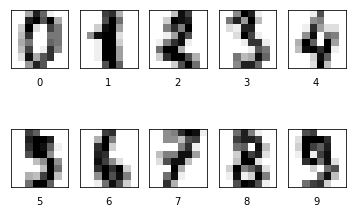

In [10]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [11]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [12]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [13]:
# sigmoid函数
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [15]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [17]:
#Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1) * 0.001  
    b = np.random.randn(1)[0] * 0.01
        
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [20]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
    A = sigmoid(np.dot(np.transpose(w),X) + b)  #
    cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    dw = np.dot(X, np.transpose(A - Y)) / m
    db = np.mean(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [34]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)            
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))         
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost


In [35]:
A = sigmoid(np.array([[0.02,0.5,0.3]]))
b = np.log(1 - A)
-np.mean(b * b)

-0.7244117094785937

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [36]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [40]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(np.transpose(w),X) + b)  # (1,m)
    
    for i in range(A.shape[1]):
        if A[0][i] >= 0.5:
            Y_prediction[0][i] = 1
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [57]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)
    Y_train = Y_train.reshape(1,Y_train.shape[0])
    Y_test = Y_test.reshape(1, Y_test.shape[0])
    
    w,b = initialize_parameters(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    pred_train = predict(w, b, X_train)
    traing_accuracy = np.mean(pred_train == Y_train)
    pred_test = predict(w, b, X_test)
    test_accuracy = np.mean(pred_test == Y_test)
    
    d = {"w":w,
         "b":b,
         "training_accuracy": traing_accuracy,
         "test_accuracy":test_accuracy,
         "cost":costs}
    return d    

In [60]:
d = model(X_train, y_train, X_test, y_test, num_iterations=1000, learning_rate=0.01,print_cost=True)
d

Cost after iteration 0: 0.692173
Cost after iteration 100: 0.326000
Cost after iteration 200: 0.301497
Cost after iteration 300: 0.262642
Cost after iteration 400: 0.240986
Cost after iteration 500: 0.235917
Cost after iteration 600: 0.231252
Cost after iteration 700: 0.229364
Cost after iteration 800: 0.228594
Cost after iteration 900: 0.228184


{'w': array([[-3.34942281e-05],
        [-1.76580488e-02],
        [ 2.15696393e-02],
        [-3.89830416e-02],
        [ 8.99886970e-02],
        [ 9.19133975e-02],
        [ 1.66416009e-01],
        [-3.28416125e-02],
        [ 1.23863180e-02],
        [-1.45733691e-01],
        [ 1.34130750e-01],
        [ 1.31782215e-01],
        [-6.78185429e-02],
        [-4.48849712e-02],
        [-1.75212199e-02],
        [ 3.37587005e-02],
        [-8.00806096e-03],
        [ 8.66589796e-02],
        [ 1.48009203e-01],
        [-5.46179836e-02],
        [-2.24151199e-01],
        [-1.06993570e-01],
        [-1.06754478e-01],
        [-3.91889124e-02],
        [-8.88326147e-03],
        [-2.33845334e-01],
        [ 5.64417854e-02],
        [ 2.19588086e-01],
        [ 2.38785025e-03],
        [ 2.22363121e-01],
        [-1.71399607e-01],
        [-9.89275586e-03],
        [ 1.08157655e-03],
        [-2.79082638e-01],
        [-3.98483872e-02],
        [ 1.78071105e-01],
        [-6.29811796e-0

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

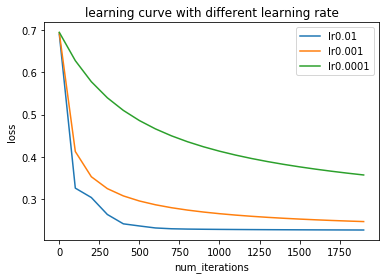

In [63]:
import matplotlib
import matplotlib.pyplot as plt

lr_list = [0.01, 0.001, 0.0001]
num_iterations = 2000
iter_num = [i for i in range(0, num_iterations, 100)]

for lr in lr_list:
    d = model(X_train, y_train, X_test, y_test, num_iterations, learning_rate=lr,print_cost=False)
    costs = d['cost']
    plt.plot(iter_num, costs, label='lr{}'.format(lr))
plt.title('learning curve with different learning rate')
plt.xlabel('num_iterations')
plt.ylabel('loss')
plt.legend()
plt.show()

##### 4.2 Observe the effect of iteration_num on the test accuracy.

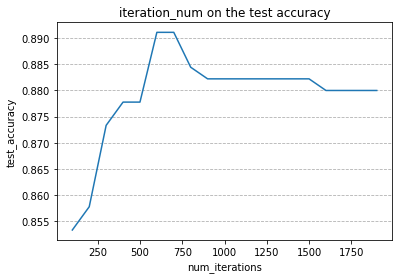

In [65]:
iter_list = [i for i in range(100,2000,100)]
test_accuracy = []
for num in iter_list:
    d = model(X_train, y_train, X_test, y_test, num_iterations=num, learning_rate=0.01,print_cost=False)
    test_accuracy.append(d['test_accuracy'])
plt.plot(iter_list,test_accuracy)
plt.title('iteration_num on the test accuracy')
plt.xlabel('num_iterations')
plt.ylabel('test_accuracy')

plt.grid(axis='y',linestyle='--')
plt.show()

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [88]:
def initialize_parameters(m,n):
    w = np.random.randn(m, n) * 0.001
    b = np.random.randn(n) * 0.01
    return w, b

In [91]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z),axis = -1).reshape(-1,1)

softmax([[1,2,1,2],[2,1,0,1]])

array([[0.13447071, 0.36552929, 0.13447071, 0.36552929],
       [0.53444665, 0.19661193, 0.07232949, 0.19661193]])

In [125]:
def propagate(w,b,X,Y):
    m = X.shape[0]
    A = softmax(np.dot(X,w) + b) 
    cost = np.mean(-np.sum(Y * np.log(A),axis = -1))
    
    dw = np.dot(X.T, (A- Y)) / m
    db = np.mean(A - Y, axis = 0)
    
    grads = {'dw':dw,
           'db': db }
    
    return grads, cost

In [126]:
def optimize(w, b, X, Y, num_iterations,learning_rate, print_cost= False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("Cost after iteration % i: %f" % (i, cost))
            
    params = {'w':w,
             'b':b}
    
    grads = {'dw':dw,
            'db':db}
    
    return params, grads, costs
    

In [130]:
def predict(w, b, X):
    A = softmax(np.dot(X, w) + b)
    
    Y_prediction = np.argmax(A, axis = -1)
    
    return Y_prediction

In [131]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    y_train = np.eye(10)[Y_train]
    y_test = np.eye(10)[Y_test]
    
    w,b = initialize_parameters(64, 10)
    params, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    w = params['w']
    b = params['b']
    pred_train = predict(w, b, X_train)
    traing_accuracy = np.mean(pred_train == Y_train)
    pred_test = predict(w, b, X_test)
    test_accuracy = np.mean(pred_test == Y_test)
    
    d = {"training_accuracy":traing_accuracy,
        "test_accuracy":test_accuracy}
    
    return d, params   
    

In [132]:
d,params = model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.01, print_cost=True)
d

Cost after iteration  0: 2.308655
Cost after iteration  100: 0.165202
Cost after iteration  200: 0.117795
Cost after iteration  300: 0.096301
Cost after iteration  400: 0.083033
Cost after iteration  500: 0.073668
Cost after iteration  600: 0.066555
Cost after iteration  700: 0.060901
Cost after iteration  800: 0.056267
Cost after iteration  900: 0.052384
Cost after iteration  1000: 0.049072
Cost after iteration  1100: 0.046205
Cost after iteration  1200: 0.043695
Cost after iteration  1300: 0.041473
Cost after iteration  1400: 0.039490
Cost after iteration  1500: 0.037706
Cost after iteration  1600: 0.036092
Cost after iteration  1700: 0.034622
Cost after iteration  1800: 0.033277
Cost after iteration  1900: 0.032041


{'training_accuracy': 0.9985152190051967, 'test_accuracy': 0.9688888888888889}

In [133]:
predict(params['w'],params['b'], X_test[:10])

array([6, 6, 0, 4, 9, 5, 8, 6, 2, 0], dtype=int64)

In [134]:
Y_test[:10]

array([6, 6, 0, 4, 9, 5, 8, 6, 2, 0])

# Congratulations ! You have completed assigment 7. 

In [ ]:
参考
https://blog.csdn.net/z526830652/article/details/79782505
https://blog.csdn.net/qq_16540387/article/details/79201363